**Лабораторная работа 11**

Применение метода LU разложения


> Вариант 9

Поиск обратной матрицы с помощью LU разложения

In [ ]:
import random
import numpy
import matplotlib.pyplot as plt

def rand(a, b):
  return random.random() * (b - a) + a

def generate_vector(n, a, b):
  res_s = [0] * n
  for j in range(n):
    res_s[j] = rand(a, b)
  return numpy.array(res_s)

def generate_matrix(n, a, b):
  res = []
  for i in range(n):
    res_s = [0] * n
    for j in range(n):
      res_s[j] = rand(a, b)
    res.append(res_s)
    
  return numpy.array(res)

print(generate_matrix(5, 0, 2))
print(generate_vector(5, 0, 2))

[[0.20950226 0.30817279 1.959043   1.5062472  1.90859861]
 [1.38112027 0.97145501 1.60295762 1.03901746 0.92888024]
 [0.4970808  0.87956707 1.84961282 0.58595064 1.45534095]
 [0.12393364 0.53561732 0.92594671 0.13070371 0.60467626]
 [1.52797716 0.58847302 0.70257241 0.18348447 1.43661806]]
[1.06348021 1.13126378 0.289465   0.02407191 0.36629176]


In [ ]:
N = 5
A = generate_matrix(N, -10, 10)
b = generate_vector(N, -5, 5)

def get_split(A):
  n = len(A)
  L = numpy.eye(n)
  U = numpy.zeros((n, n))
  
  for i in range(n):
    for j in range(n):
      if i <= j:
        sum = 0.0
        for k in range(i):
          sum += L[i][k] * U[k][j]
        U[i][j] = A[i][j] - sum

      else:
        sum = 0.0
        for k in range(j):
          sum += L[i][k] * U[k][j]
        L[i][j] = 1 / U[j][j] * (A[i][j] - sum)

  return numpy.array(L), numpy.array(U)


L, U = get_split(A)
print('A-matrix: \n{}\n\nL-matrix: \n{}\n\n U-matrix: \n{}\n\n'.format(A, L, U))
res = A - numpy.matmul(L, U)
print('A - LU: \n{}\n\n'.format(res))
print('A - LU norm: \n{}\n\n'.format(numpy.linalg.norm(res)))



A-matrix: 
[[-9.12885639  3.64338973  5.3638284  -9.72072995 -3.28133939]
 [-1.60359654 -8.61460636  7.95990314  6.11153798  9.86666719]
 [-4.08513687 -1.12503337 -5.88219386  6.34135952 -6.1055778 ]
 [ 4.34731774  0.59226716 -1.63981088 -3.73732246  6.92298201]
 [-1.00788597 -8.74176829  5.0561301  -4.8889731  -7.62959201]]

L-matrix: 
[[ 1.          0.          0.          0.          0.        ]
 [ 0.17566237  1.          0.          0.          0.        ]
 [ 0.44749711  0.2977369   1.          0.          0.        ]
 [-0.47621712 -0.25147586 -0.2583239   1.          0.        ]
 [ 0.1104066   0.98805025  0.23813279  3.19193973  1.        ]]

 U-matrix: 
[[ -9.12885639   3.64338973   5.3638284   -9.72072995  -3.28133939]
 [  0.          -9.25461283   7.01768034   7.81910443  10.44307504]
 [  0.           0.         -10.37191398   8.36332217  -7.74647671]
 [  0.           0.           0.          -4.23973849   5.98543323]
 [  0.           0.           0.           0.         -34.84

In [ ]:
def solve_lower(L, f):
  res = []
  for i in range(len(L)):
    sum = 0.0
    for k in range(i):
      sum += L[i][k] * res[k]
    res.append(f[i] - sum)

  return numpy.array(res)


def solve_upper(U, f):
  res = [0] * len(f)
  for i in range(len(U) - 1, -1, -1):
    sum = 0.0
    for k in range(i + 1, len(U)):
      sum += U[i][k] * res[k]
    res[i] = (f[i] - sum) / U[i][i]
    
  return numpy.array(res)


In [ ]:
A = generate_matrix(10, -10, 10)
f = generate_vector(10, -5, 5)
L, U = get_split(A)

print(solve_lower(L, f))
print(numpy.linalg.solve(L, f))



print(solve_upper(U, f))
print(numpy.linalg.solve(U, f))


[  -0.23318411    1.43235465 -151.21635757    7.85071827   -3.35648363
    1.28149962    3.18358722    4.79581407    1.03264764   -3.60143864]
[  -0.23318411    1.43235465 -151.21635757    7.85071827   -3.35648363
    1.28149962    3.18358722    4.79581407    1.03264764   -3.60143864]
[-33.94722394  -0.94928926  -0.32070446   0.61528283  -0.17800706
  -0.24359359   0.59238798  -0.15238917  -0.43570721   0.0748861 ]
[-33.94722394  -0.94928926  -0.32070446   0.61528283  -0.17800706
  -0.24359359   0.59238798  -0.15238917  -0.43570721   0.0748861 ]


In [ ]:
def get_inverse(A):
  L, U = get_split(A)
  n = len(A)
  res = numpy.zeros((n, n))

  res[0][0] = 1 / U[0][0]


  for i in range(n):
    for j in range(i):
      sum = 0.0
      for k in range(j + 1, n):
        sum += L[k][j] * res[i][k]
      res[i][j] = - sum
  
  for i in range(n):
    for j in range(n):
      if i < j:
        sum = 0.0
        for k in range(i + 1, n):
          sum += U[i][k] * res[k][j]
        res[i][j] = - sum / U[i][i]

      elif i == j:
        sum = 0.0
        for k in range(j + 1, n):
          sum += U[j][k] * res[k][j]
        res[j][i] = (1 - sum) / U[j][j]

      else:
        sum = 0.0
        for k in range(j + 1, n):
          sum += L[k][j] * res[i][k]
        res[i][j] = - sum

    return numpy.array(res)



def get_inverse_2(A):
  L, U = get_split(A)
  n = len(A)
  xs = numpy.zeros((n, n))
  for i in range(n):
    e_i = numpy.zeros(n)
    e_i[i] = 1.0
    xs[i] = solve_upper(U, solve_lower(L, e_i))

  return xs.transpose()







In [ ]:
A = generate_matrix(3, -10, 10)

inv = get_inverse_2(A)
inv_abs = numpy.linalg.inv(A)

print(numpy.linalg.norm(inv - inv_abs))

1.3000991304329292e-14


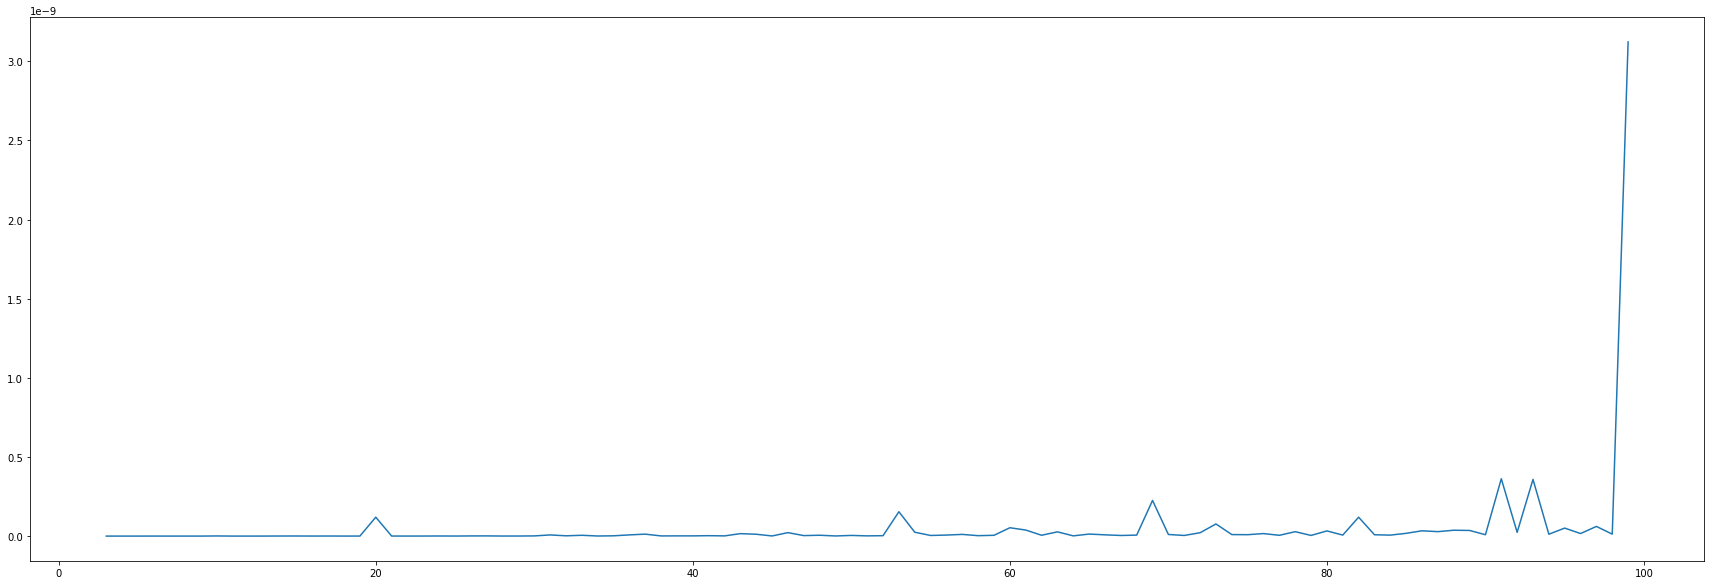

In [ ]:
def main():
  x = []
  y = []
  for i in range(3, 100):
    x.append(i)
    A = generate_matrix(i, -10, 10)
    L, U = get_split(A)
    y.append(numpy.linalg.norm(A - numpy.matmul(L, U)))

  plt.figure(figsize=(30, 10))
  plt.plot(x, y)

main()